In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/dataset.csv')

In [3]:
#column names & string values: lowercasing everything and replace spaces with underscore
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
prospect_id                                      9240 non-null object
lead_number                                      9240 non-null int64
lead_origin                                      9240 non-null object
lead_source                                      9204 non-null object
do_not_email                                     9240 non-null object
do_not_call                                      9240 non-null object
converted                                        9240 non-null int64
totalvisits                                      9103 non-null float64
total_time_spent_on_website                      9240 non-null int64
page_views_per_visit                             9103 non-null float64
last_activity                                    9137 non-null object
country                                          6779 non-null object
specialization                                   7802 

In [5]:
#getting the number of NaN values in every column
df.isnull().sum()

prospect_id                                         0
lead_number                                         0
lead_origin                                         0
lead_source                                        36
do_not_email                                        0
do_not_call                                         0
converted                                           0
totalvisits                                       137
total_time_spent_on_website                         0
page_views_per_visit                              137
last_activity                                     103
country                                          2461
specialization                                   1438
how_did_you_hear_about_x_education               2207
what_is_your_current_occupation                  2690
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
magazine                                            0
newspaper_article           

Many columns have missing values. Below I use different imputation methods to replace<br>
the missing values

In [6]:
#totalvisits has 137 missing values
#use fillna() method to replace missing values with mean value
df['totalvisits'].fillna(df['totalvisits'].mean(), inplace = True)
df['page_views_per_visit'].fillna(df['page_views_per_visit'].mean(), inplace = True)
df['asymmetrique_activity_score'].fillna(df['asymmetrique_activity_score'].mean(), inplace = True)
df['asymmetrique_profile_score'].fillna(df['asymmetrique_profile_score'].mean(), inplace = True)


In [7]:
#get one list with categorical and one list with numerical features
#'prospect_id' is not included in the model building
categorical = [#'prospect_id',
 'lead_origin',
 'lead_source',
 'do_not_email',
 'do_not_call',
 'last_activity',
 'country',
 'specialization',
 'how_did_you_hear_about_x_education',
 'what_is_your_current_occupation',
 'what_matters_most_to_you_in_choosing_a_course',
 'search',
 'magazine',
 'newspaper_article',
 'x_education_forums',
 'newspaper',
 'digital_advertisement',
 'through_recommendations',
 'receive_more_updates_about_our_courses',
 'tags',
 'lead_quality',
 'update_me_on_supply_chain_content',
 'get_updates_on_dm_content',
 'lead_profile',
 'city',
 'asymmetrique_activity_index',
 'asymmetrique_profile_index',
 'i_agree_to_pay_the_amount_through_cheque',
 'a_free_copy_of_mastering_the_interview',
 'last_notable_activity']
numerical = ['lead_number',
 'totalvisits',
 'total_time_spent_on_website',
 'page_views_per_visit',
 'asymmetrique_activity_score',
 'asymmetrique_profile_score']

In [8]:
#check if any of the numerical variables still have NaN values
n = 0
for n in numerical:
    print(df[n].isnull().sum())
    n =+ 1

0
0
0
0
0
0


In [9]:
#for 'lead_source', use impuation method 'most common class'
df['lead_source'].fillna(df['lead_source'].value_counts().index[0], inplace=True)

In [10]:
#for 'last_activity', use impution method 'most common class'
df['last_activity'].fillna(df['last_activity'].value_counts().index[0], inplace=True)

In [11]:
#for 'country', we use imputation method 'unknown' class
df['country'].fillna("unknown", inplace=True)
df['specialization'].fillna("unknown", inplace=True)
df['how_did_you_hear_about_x_education'].fillna("unknown", inplace=True)
df['what_is_your_current_occupation'].fillna("unknown", inplace=True)
df['what_matters_most_to_you_in_choosing_a_course'].fillna("unknown", inplace=True)
df['lead_quality'].fillna("unknown", inplace=True)
df['tags'].fillna("unknown", inplace=True)
df['lead_profile'].fillna("unknown", inplace=True)
df['city'].fillna("unknown", inplace=True)
df['asymmetrique_activity_index'].fillna("unknown", inplace=True)
df['asymmetrique_profile_index'].fillna("unknown", inplace=True)

In [12]:
#checking if there are still any NaN values
df.isnull().sum()

prospect_id                                      0
lead_number                                      0
lead_origin                                      0
lead_source                                      0
do_not_email                                     0
do_not_call                                      0
converted                                        0
totalvisits                                      0
total_time_spent_on_website                      0
page_views_per_visit                             0
last_activity                                    0
country                                          0
specialization                                   0
how_did_you_hear_about_x_education               0
what_is_your_current_occupation                  0
what_matters_most_to_you_in_choosing_a_course    0
search                                           0
magazine                                         0
newspaper_article                                0
x_education_forums             

In [13]:
#splitting the dataset in different subsets
from sklearn.model_selection import train_test_split

In [14]:
#shuffling the data of df and splitting it into 2 sets
#df_train_full (80%), df_test(20%)
#random_state guarantees that the data is always shuffled in the same way
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [15]:
#take df_train_full and split it into train and val
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)
#save target value in matrix array
y_train = df_train.converted.values
y_val = df_val.converted.values
#delete target variable from training and validation set
del df_train['converted']
del df_val['converted']

In [16]:
#check distribution of target variable
#two thirds did not convert
df_train_full.converted.value_counts()

0    4560
1    2832
Name: converted, dtype: int64

In [17]:
#get conversion rate
#it seems to be an inbalanced dataset
global_mean = df_train_full.converted.mean()
round(global_mean, 5)

0.38312

<b>Mutual Information (MI)</b>
* tells us how much info we learn about one variable if we know the value of other variables
* we use it to measure mutual dependency between 2 variables
* higher mutual info means higher dependency
* MI only works for categorical but not for numerical variables

In [18]:
#get mutual info of all categorical variables
#... most useful, ... least useful variable
from sklearn.metrics import mutual_info_score

#this function calculates mutual information
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.converted)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
tags,3.769913e-01
lead_quality,1.861223e-01
lead_profile,1.138871e-01
what_is_your_current_occupation,9.238140e-02
last_activity,8.462909e-02
last_notable_activity,7.251663e-02
lead_source,6.123760e-02
what_matters_most_to_you_in_choosing_a_course,5.569131e-02
lead_origin,5.559875e-02
how_did_you_hear_about_x_education,4.773990e-02


In [19]:
#calculate correlation coefficient between numerical features and target variable
df_train_full[numerical].corrwith(df_train_full.converted)

lead_number                    0.021904
totalvisits                    0.033282
total_time_spent_on_website    0.363470
page_views_per_visit           0.001532
asymmetrique_activity_score    0.122210
asymmetrique_profile_score     0.165779
dtype: float64

In [20]:
def prepare_X(df_inp):
    #convert training set to dictionary
    train_dict = df_inp[categorical + numerical].to_dict(orient='rows')
    from sklearn.feature_extraction import DictVectorizer
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)
    #use 'transform' method to convert dictionaries to matrix
    X = dv.transform(train_dict)
    return X

In [21]:
#train logistic regression model
from sklearn.linear_model import LogisticRegression
#train model by calling 'fit' method
model = LogisticRegression(solver='liblinear', random_state = 1)
model.fit(prepare_X(df_train), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
def prepare_val(df_inp):
    #convert training set to dictionary
    train_dict = df_inp[categorical + numerical].to_dict(orient='rows')
    from sklearn.feature_extraction import DictVectorizer
    dv_new = DictVectorizer(sparse=False)
    dv_new.fit(train_dict)
    #use 'transform' method to convert dictionaries to matrix
    X = dv_new.transform(train_dict)
    return X

In [23]:
#use model to predict target variable
y_pred = model.predict_proba(prepare_val(df_val))[:, 1]
y_pred >= 0.5
converted = y_pred >= 0.5
print('Accuracy', (y_val == converted).mean())

ValueError: X has 188 features per sample; expecting 205

The above cell throws an error. Reason: the number of features in the training set and the validation set is different, after the one-hot encoding was conducted. The outputs of the cells below also give that result (205 != 188)

In [24]:
train_dict = df_train[categorical + numerical].to_dict(orient='rows')
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
#use 'transform' method to convert dictionaries to matrix
X = dv.transform(train_dict)
X.shape

(4952, 205)

In [25]:
#get a list with all the feature names (column names) from training set after the one-hot-encoding
list_train = dv.get_feature_names()

In [26]:
train_dict = df_val[categorical + numerical].to_dict(orient='rows')
from sklearn.feature_extraction import DictVectorizer
dv_new = DictVectorizer(sparse=False)
dv_new.fit(train_dict)
#use 'transform' method to convert dictionaries to matrix
X = dv_new.transform(train_dict)
X.shape

(2440, 188)

In [27]:
#get a list with all the feature names (column names) from validation set after the one-hot-encoding
list_val = dv_new.get_feature_names()

In [28]:
#get those items, that only exist in one of the lists
diff_list = list(set(list_train) - set(list_val))

In [29]:
#calculate the difference of the length between the 2 lists
len_diff_list = len(list_train) - len(list_val)

In [30]:
len_diff_list

17

In [31]:
#below is a example that helps to understand how to add columns to a df, where the values are 0
data = {'Name': ['Jai', 'Princi', 'Gaurav', 'Anuj'], 
        'Height': [5.1, 6.2, 5.1, 5.2], 
        'Qualification': ['Msc', 'MA', 'Msc', 'Msc']} 
df = pd.DataFrame(data)

In [32]:
df

,Name,Height,Qualification
0,Jai,5.1,Msc
1,Princi,6.2,MA
2,Gaurav,5.1,Msc
3,Anuj,5.2,Msc


In [33]:
for n in diff_list:
    df[n] = 0

In [34]:
df

,Name,Height,Qualification,lead_source=nc_edm,country=denmark,lead_source=welearn,country=italy,country=russia,country=china,country=nigeria,...,what_matters_most_to_you_in_choosing_a_course=flexibility_&_convenience,last_notable_activity=email_marked_spam,last_notable_activity=email_received,lead_source=press_release,country=liberia,country=philippines,country=sri_lanka,country=kenya,country=vietnam,country=uganda
0,Jai,5.1,Msc,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Princi,6.2,MA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Gaurav,5.1,Msc,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Anuj,5.2,Msc,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
def prepare_X(df_inp):
    train_dummies = pd.get_dummies(df_inp[categorical + numerical])
    #use 'values' method to convert df to matrix
    X = train_dummies.values
    return X

In [36]:
#train logistic regression model
from sklearn.linear_model import LogisticRegression
#train model by calling 'fit' method
model = LogisticRegression(solver='liblinear', random_state = 1)
model.fit(prepare_X(df_train), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
def prepare_val(df_inp):
    train_dummies = pd.get_dummies(df_inp[categorical + numerical])
    #add missing features by adding columns, where the values are 0
    for n in range(len_diff_list):
        train_dummies[n] = 0
    #use 'values' method to convert df to matrix
    X = train_dummies.values
    return X

In [38]:
#use model to predict target variable
y_pred = model.predict_proba(prepare_val(df_val))[:, 1]
y_pred >= 0.5
converted = y_pred >= 0.5
print('Accuracy', (y_val == converted).mean())

Accuracy 0.7245901639344262


<b>Useful links that help to understand how to deal with datasets of different sizes</b>
* https://stackoverflow.com/questions/44266677/machine-learning-test-set-with-fewer-features-than-the-train-set
* https://stackoverflow.com/questions/45422000/add-n-zeros-to-the-end-of-an-array


Text(0.5, 1.0, 'ROC Curve')

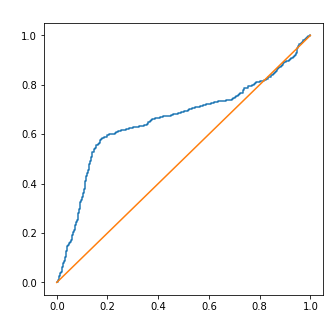

In [40]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate', color='white')
plt.ylabel('True Positive Rate', color='white')
plt.title('ROC Curve', color='white')